LAB 5: Wide and Deep Network Architectures

Jocelyn Rupp and Julia Rushton 

# Dataset Selection

Select a dataset similarly to lab one. That is, the dataset must be table data and must have categorical features. In terms of generalization performance, it is helpful to have a large dataset for building a wide and deep network. It is also helpful to have many different categorical features to create the embeddings and cross-product embeddings. It is fine to perform binary classification, multi-class classification, or regression. You are NOT allowed to use the census (i.e., Adult) dataset that was given as an example in class. 

# Preparation

In [44]:
import pandas as pd

In [45]:
import numpy as np

In [46]:
data_path = 'collision-data.csv'
df = pd.read_csv(data_path)

df.head()

Unnamed: 0   longitude   latitude  SEVERITYCODE COLLISIONTYPE  PERSONCOUNT  \
0           1 -122.324322  47.613755             0    Parked Car            2   
1           2 -122.321556  47.571558             0    Rear Ended            3   
2           3 -122.344164  47.555769             1       Head On            2   
3           4 -122.309400  47.608484             1    Rear Ended            2   
4           5 -122.319746  47.674521             0     Left Turn            2   

   PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  ...           response_type  \
0         0            0         2         0  ...                     NaN   
1         0            0         3         0  ...                     NaN   
2         0            0         2         1  ...                     NaN   
3         0            0         2         1  ...  Motor Vehicle Accident   
4         0            0         2         0  ...                     NaN   

   response_time AWND  PRCP  SNOW SNWD  TAVG  TMAX  TMIN  WSF5  
0            NaN  9.4   0.0   NaN  NaN  33.0    38    27  17.0  
1            NaN  9.4   0.0   NaN  NaN  33.0    38    27  17.0  
2            NaN  9.4   0.0   NaN  NaN  33.0    38    27  17.0  
3           36.0  9.4   0.0   NaN  NaN  33.0    38    27  17.0  
4            NaN  9.4   0.0   NaN  NaN  33.0    38    27  17.0  

[5 rows x 34 columns]

In [47]:
df["SEVERITYCODE"].value_counts()

0    71979
1    37804
2     1909
3      190
Name: SEVERITYCODE, dtype: int64

Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). You have the option of using tf.dataset for processing, but it is not required.

In [48]:
#
# Remove attributes that arent useful for us
df.drop(['WSF5','TMIN','TMAX', 'SNOW', 'SNWD', 'response_type', 'JUNCTIONTYPE', 'response_time'], axis = 1, inplace = True)
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111882 entries, 0 to 111881
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            111882 non-null  int64  
 1   longitude             111882 non-null  float64
 2   latitude              111882 non-null  float64
 3   SEVERITYCODE          111882 non-null  int64  
 4   COLLISIONTYPE         111882 non-null  object 
 5   PERSONCOUNT           111882 non-null  int64  
 6   PEDCOUNT              111882 non-null  int64  
 7   PEDCYLCOUNT           111882 non-null  int64  
 8   VEHCOUNT              111882 non-null  int64  
 9   INJURIES              111882 non-null  int64  
 10  SERIOUSINJURIES       111882 non-null  int64  
 11  FATALITIES            111882 non-null  int64  
 12  INATTENTIONIND        111882 non-null  bool   
 13  UNDERINFL             111882 non-null  bool   
 14  WEATHER               111882 non-null  object 
 15  

In [49]:
# preprocessing of numeric variables

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Check the columns in the dataset
print(df.columns)

# Define unnecessary columns to drop
unnecessary_columns = ['Unnamed: 0', 'SPDCASENO', 'DATE', 'TIME']
df.drop(unnecessary_columns, axis=1, errors='ignore', inplace=True)

bool_cols = ["INATTENTIONIND", "UNDERINFL", "SPEEDING", "HITPARKEDCAR", "intersection_related", "LIGHTCOND"]
df[bool_cols] = df[bool_cols].astype(str)

# Determine variable types and describe the final dataset
variable_types = {}
numeric_cols = ['longitude', 'latitude', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 
                'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'AWND', 'PRCP', 'TAVG']
for col in df.columns:
    if col in numeric_cols:
        variable_types[col] = 'Numeric'
    else:
        variable_types[col] = 'Categorical'

final_dataset_description = df.describe()

print("Variable Types:")
for col, v_type in variable_types.items():
    print(f"{col}: {v_type}")

print("\nFinal Dataset Description:")
print(final_dataset_description)

Index(['Unnamed: 0', 'longitude', 'latitude', 'SEVERITYCODE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR',
       'SPDCASENO', 'DATE', 'TIME', 'intersection_related', 'AWND', 'PRCP',
       'TAVG'],
      dtype='object')


Variable Types:
longitude: Numeric
latitude: Numeric
SEVERITYCODE: Categorical
COLLISIONTYPE: Categorical
PERSONCOUNT: Numeric
PEDCOUNT: Numeric
PEDCYLCOUNT: Numeric
VEHCOUNT: Numeric
INJURIES: Numeric
SERIOUSINJURIES: Numeric
FATALITIES: Numeric
INATTENTIONIND: Categorical
UNDERINFL: Categorical
WEATHER: Categorical
ROADCOND: Categorical
LIGHTCOND: Categorical
SPEEDING: Categorical
HITPARKEDCAR: Categorical
intersection_related: Categorical
AWND: Numeric
PRCP: Numeric
TAVG: Numeric

Final Dataset Description:
           longitude       latitude   SEVERITYCODE    PERSONCOUNT  \
count  111882.000000  111882.000000  111882.000000  111882.000000   
mean     -122.335152      47.618769       0.377112       2.720947   
std         0.027573       0.055533       0.528408       1.352413   
min      -122.419544      47.494701       0.000000       1.000000   
25%      -122.351673      47.576766       0.000000       2.000000   
50%      -122.335404      47.614668       0.000000       2.000000   
7

Identify groups of features in your data that should be combined into cross-product features. Provide a compelling justification for why these features should be crossed (or why some features should not be crossed). 

Group 1: Severity Code and Collision Type
Group 2: Weather, Road, and Light Condition, Severity Code
Group 3: Speeding, Collision Type, Underthe influence

EXPLAIN WHY 

Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

recall because we want to mitigate false positives, would be really bad if an injury was not coded a 3 and it was

macro recall of each class

Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. Use the method to split your data that you argue for. 

data set is sufficiently large and do not need to use cross validatoin for porving 

use a basic 80 20 split for testing

In [68]:
from sklearn.model_selection import train_test_split
import plotly


# X = df.drop('SEVERITYCODE', axis=1)  # Features
# y = df['SEVERITYCODE'].to_numpy()  # Target variable

## ask about plotting recall with multiclass
#y = (y > 1).astype(int) 

# Split the data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify = df['SEVERITYCODE'])

# Modeling

In [69]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
import tensorflow.keras as keras

batch_size = 64

def create_dataset_from_dataframe(df_input, outcome):

    df = df_input.copy()
    labels = keras.utils.to_categorical(df[outcome])

    df = {key: value.values[:,np.newaxis] for key, value in df_input[[col for col in df.columns if col != outcome]].items()}

    # create the Dataset here
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    
    # now enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    
    return ds

ds_train = create_dataset_from_dataframe(df_train, "SEVERITYCODE")
ds_test = create_dataset_from_dataframe(df_test, "SEVERITYCODE")

 Create at least three combined wide and deep networks to classify your data using Keras (this total of "three" includes the model you will train in the next step of the rubric). Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. 
Note: you can use the "history" return parameter that is part of Keras "fit" function to easily access this data.

In [70]:
from tensorflow.keras.utils import FeatureSpace

# Example One: Just lump everything together, and concatenate
feature_space = FeatureSpace(
    features={
        # Categorical feature encoded as string
        ##CHANGE
        "COLLISIONTYPE": FeatureSpace.string_categorical(num_oov_indices=0),
        "INATTENTIONIND": FeatureSpace.string_categorical(num_oov_indices=0),
        "UNDERINFL": FeatureSpace.string_categorical(num_oov_indices=0),
        "WEATHER": FeatureSpace.string_categorical(num_oov_indices=0),
        "ROADCOND": FeatureSpace.string_categorical(num_oov_indices=0),
        "LIGHTCOND": FeatureSpace.string_categorical(num_oov_indices=0),
        "HITPARKEDCAR": FeatureSpace.string_categorical(num_oov_indices=0),
        "SPEEDING": FeatureSpace.string_categorical(num_oov_indices=0),
        "intersection_related": FeatureSpace.string_categorical(num_oov_indices=0),
        
        # Numeric features
        "longitude": FeatureSpace.float_normalized(),
        "latitude": FeatureSpace.float_normalized(),
        "PERSONCOUNT": FeatureSpace.float_normalized(),
        "PEDCOUNT": FeatureSpace.float_normalized(),
        "PEDCYLCOUNT": FeatureSpace.float_normalized(),
        "VEHCOUNT": FeatureSpace.float_normalized(),
        "INJURIES": FeatureSpace.float_normalized(),
        "SERIOUSINJURIES": FeatureSpace.float_normalized(),
        "FATALITIES": FeatureSpace.float_normalized(),
        "AWND": FeatureSpace.float_normalized(),
        "PRCP": FeatureSpace.float_normalized(),
        "TAVG": FeatureSpace.float_normalized()        
    },
    
    # Specify feature cross with a custom crossing dim
    # Severity Code and Collision Type
    #  Group 2: Weather, Road, and Light Condition, Severity Code
    # Group 3: Speeding, Collision Type, Underthe influence
    # NROADCOND', 'LIGHTCOND', 'SPEEDING'
    crosses=[
        FeatureSpace.cross(
            feature_names=('INATTENTIONIND','COLLISIONTYPE'),  
            crossing_dim=2*9),
        FeatureSpace.cross(
            feature_names=('WEATHER', 'ROADCOND'), 
            crossing_dim=8*7),
        FeatureSpace.cross(
            feature_names=('SPEEDING','UNDERINFL'),
            crossing_dim=2*2),
    ],
    output_mode="concat", # can also be a dict, processed internally
)


In [71]:
# create a version of the dataset that can be iterated without labels
train_ds_with_no_labels = ds_train.map(lambda x, _: x)  
feature_space.adapt(train_ds_with_no_labels)

In [72]:
from tensorflow.keras.layers import Embedding, Flatten

def setup_embedding_from_categorical(feature_space, col_name):
    # what the maximum integer value for this variable?
    # which is the same as the number of categories
    N = len(feature_space.preprocessors[col_name].get_vocabulary())
    
    # get the output from the feature space, which is input to embedding
    x = feature_space.preprocessors[col_name].output
    
    # now use an embedding to deal with integers from feature space
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x # return the tensor here 
        
def setup_embedding_from_crossing(feature_space, col_name):
    # what the maximum integer value for this variable?
    
    # get the size of the feature
    N = feature_space.crossers[col_name].num_bins
    x = feature_space.crossers[col_name].output
    
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x

Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two models (this "two" includes the wide and deep model trained from the previous step). Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to answer: What model with what number of layers performs superiorly? Use proper statistical methods to compare the performance of different models.

In [73]:
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

numeric_headers = list(filter(lambda x: variable_types[x] == "Numeric", variable_types.keys()))
categorical_headers = list(filter(lambda x: variable_types[x] == "Categorical" and x != "SEVERITYCODE", variable_types.keys()))

/Users/Jocelyn/anaconda3/envs/JRenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ COLLISIONTYPE       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ INATTENTIONIND      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNDERINFL           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ WEATHER             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROADCOND            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LIGHTCOND           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SPEEDING            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ HITPARKEDCAR        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ intersection_relat… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ COLLISIONTYPE[0]… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ INATTENTIONIND[0… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ UNDERINFL[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ WEATHER[0][0]     │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ ROADCOND[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ LIGHTCOND[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ SPEEDING[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ HITPARKEDCAR[0][

 Total params: 3,564 (13.97 KB)

 Trainable params: 3,528 (13.78 KB)

 Non-trainable params: 36 (192.00 B)

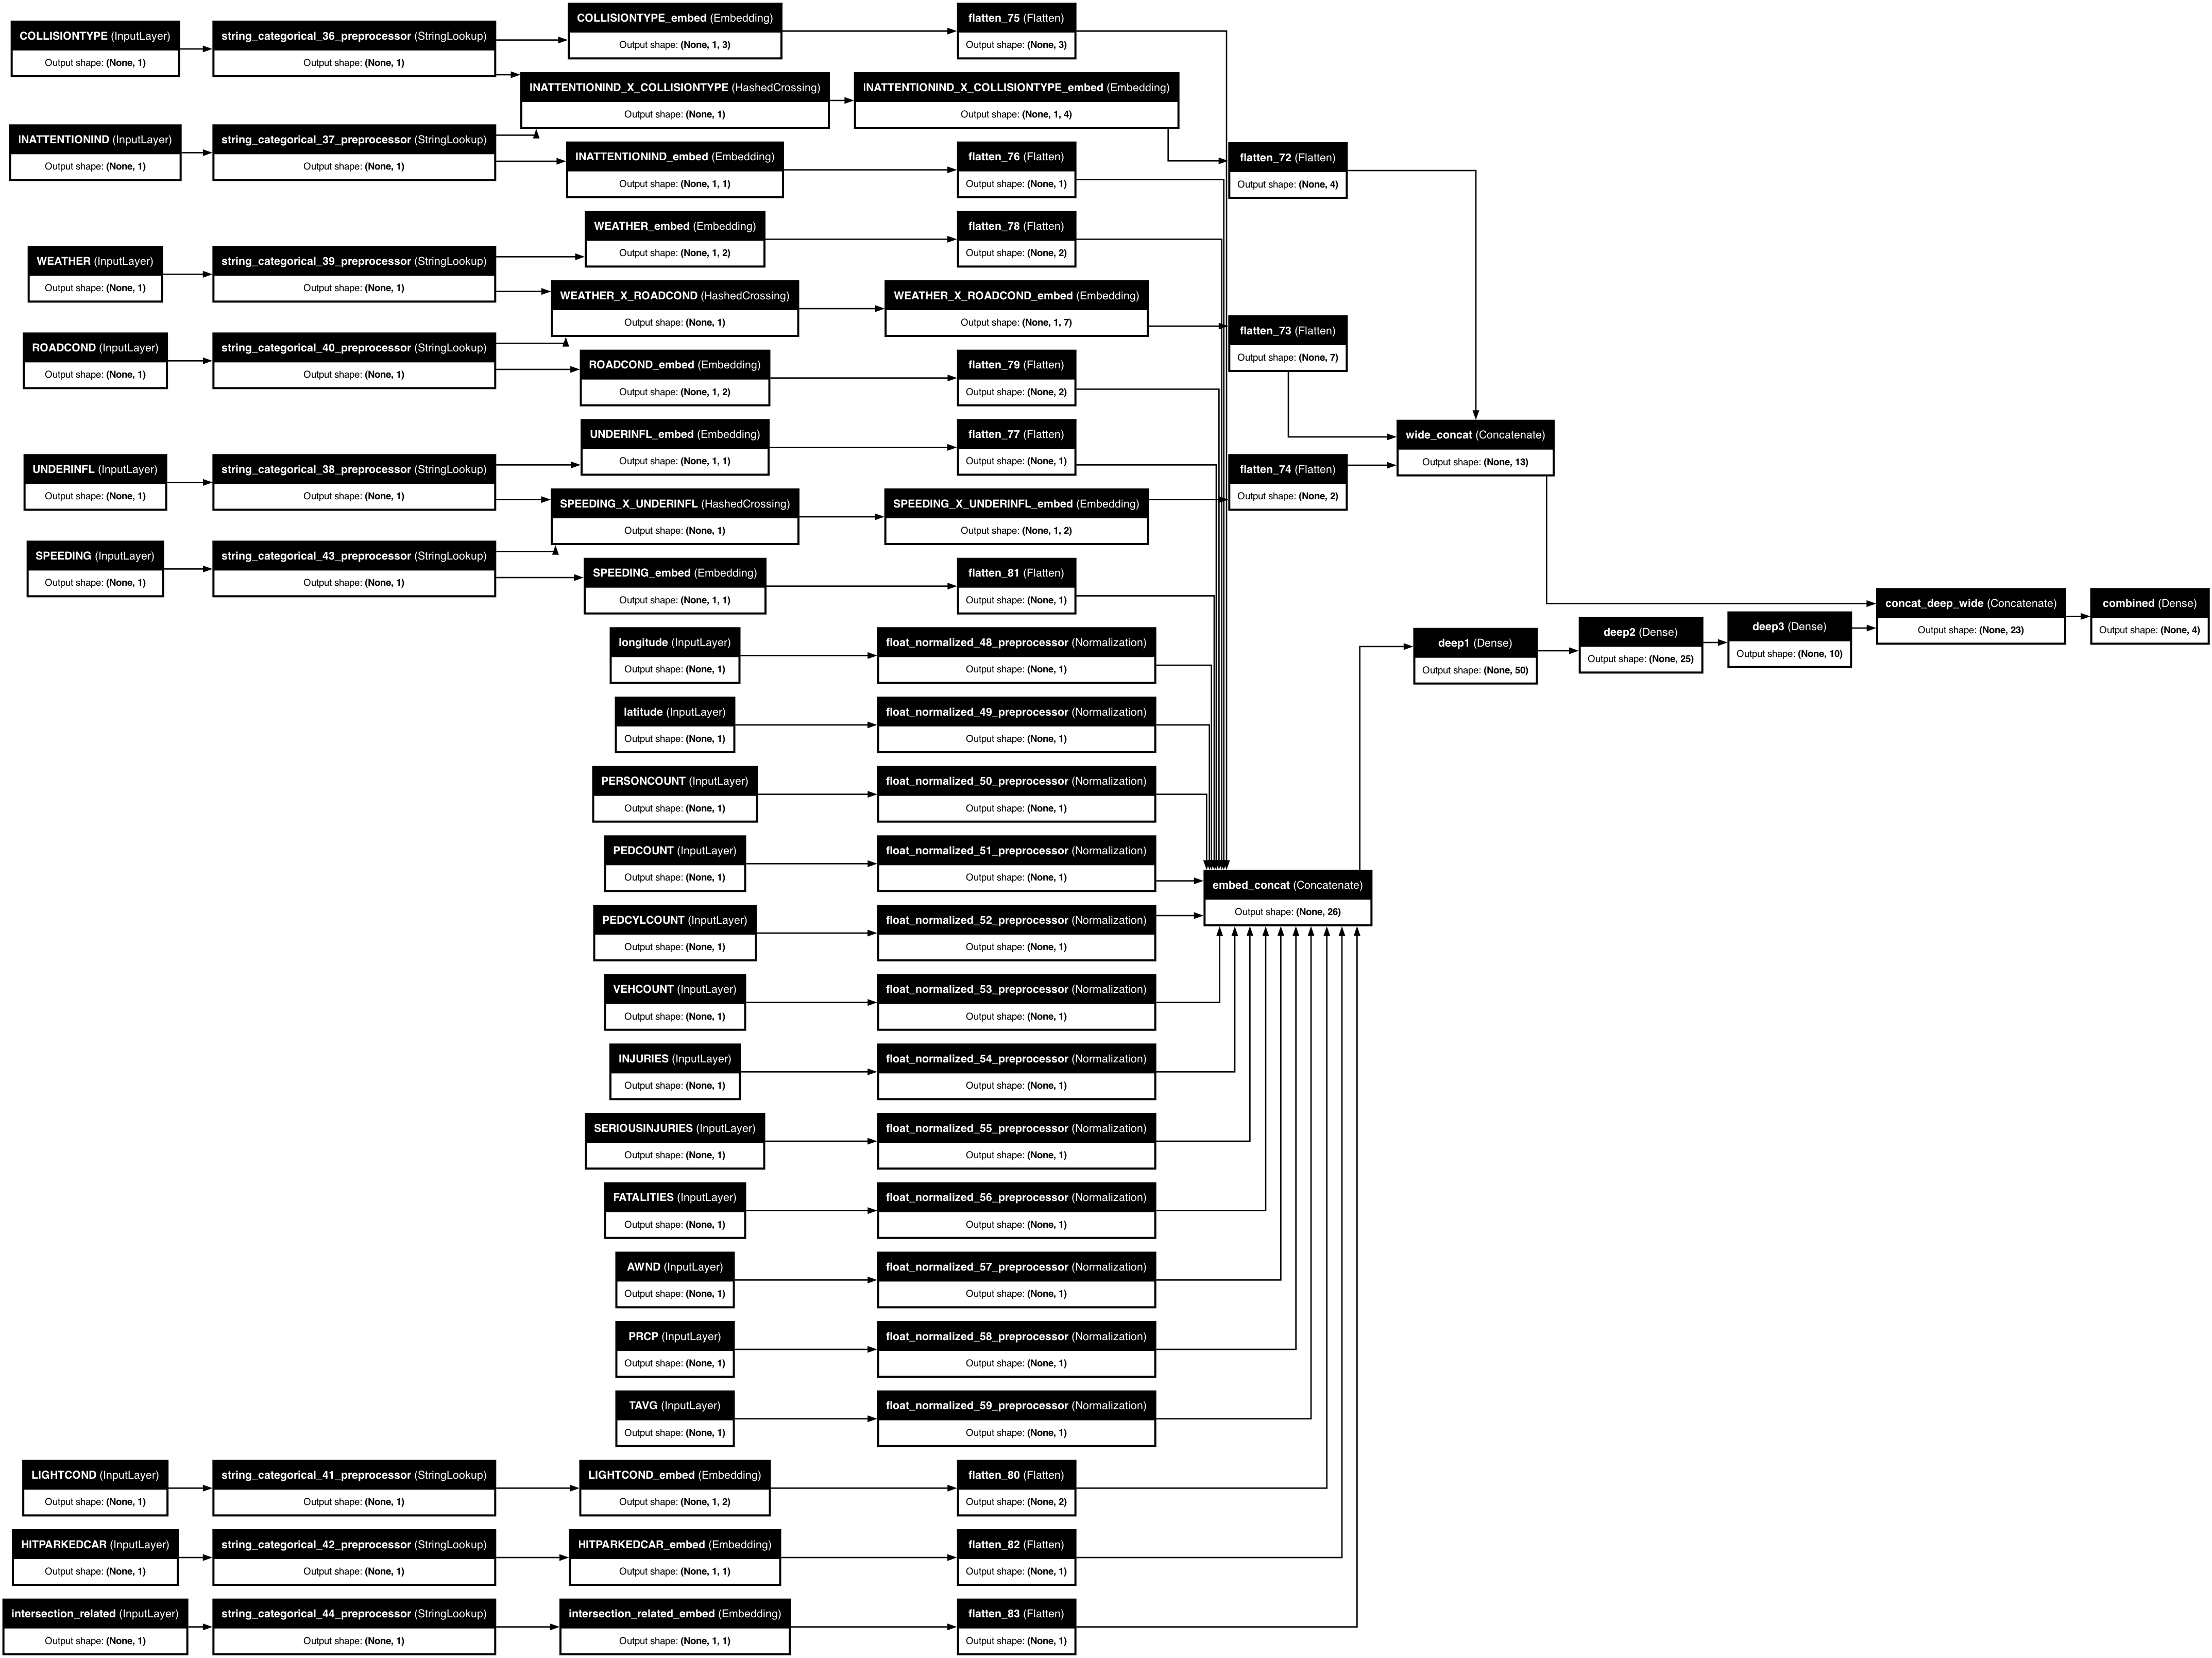

In [74]:
dict_inputs = feature_space.get_inputs() # need to use unprocessed features here, to gain access to each output

# we need to create separate lists for each branch
crossed_outputs = []

# for each crossed variable, make an embedding
for col in feature_space.crossers.keys():
    
    x = setup_embedding_from_crossing(feature_space, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

# reset this input branch
all_deep_branch_outputs = []

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space.preprocessors[col].output
    # x = tf.cast(x,float) # cast an integer as a float here
    all_deep_branch_outputs.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)


# merge the deep branches together
deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
final_branch = Dense(units=4,activation='softmax',
                     name='combined')(final_branch)

training_model = keras.Model(inputs=dict_inputs, outputs=final_branch)
training_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

training_model.summary()

plot_model(
    training_model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [75]:
# saving each loss function at each epoch
history = training_model.fit(
    ds_train, epochs = 10, validation_data = ds_test
)

Epoch 1/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9164 - loss: 0.2247 - val_accuracy: 1.0000 - val_loss: 3.0932e-04
Epoch 2/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 5.1976e-04 - val_accuracy: 1.0000 - val_loss: 5.9580e-05
Epoch 3/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 6.0053e-05 - val_accuracy: 1.0000 - val_loss: 1.2343e-05
Epoch 4/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.0709e-05 - val_accuracy: 1.0000 - val_loss: 4.7146e-06
Epoch 5/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 4.3487e-06 - val_accuracy: 1.0000 - val_loss: 2.0158e-06
Epoch 6/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 2.0975e-06 - val_accuracy: 1.0000 - val_loss: 9.1014e-07
Epoch 7/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 8.5092e-07 - val_accuracy: 1.0000 - val_loss: 4.0032e-07
Epoch 8/10
1399/1399 ━━━━━━━━━━━━━━━━

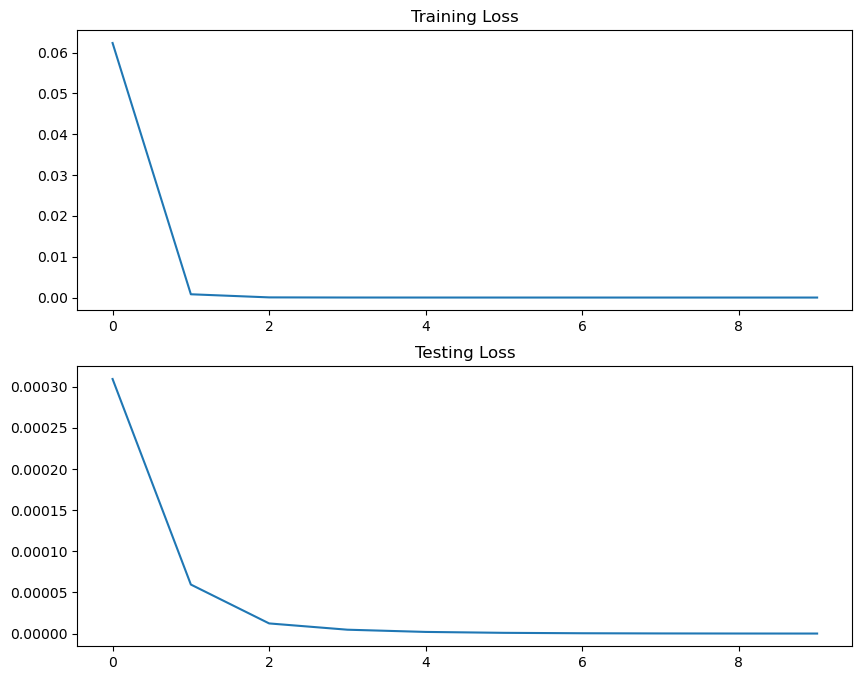

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(history.history["loss"])
plt.title("Training Loss")

plt.subplot(2,1,2)
plt.plot(history.history["val_loss"])
plt.title("Testing Loss")

plt.show()

In [77]:
import sklearn.metrics as mt

pred = training_model.predict(ds_test)
yhat = np.argmax(pred, axis = 1)

print(mt.classification_report(df_test["SEVERITYCODE"], yhat))
mt.recall_score(df_test["SEVERITYCODE"], yhat, average = "macro")

350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14396
           1       1.00      1.00      1.00      7561
           2       1.00      1.00      1.00       382
           3       1.00      1.00      1.00        38

    accuracy                           1.00     22377
   macro avg       1.00      1.00      1.00     22377
weighted avg       1.00      1.00      1.00     22377



1.0

# Model 2:

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ COLLISIONTYPE       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ INATTENTIONIND      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNDERINFL           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ WEATHER             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROADCOND            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LIGHTCOND           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SPEEDING            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ HITPARKEDCAR        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ intersection_relat… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ COLLISIONTYPE[0]… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ INATTENTIONIND[0… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ UNDERINFL[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ WEATHER[0][0]     │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ ROADCOND[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ LIGHTCOND[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ SPEEDING[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ HITPARKEDCAR[0][

 Total params: 3,599 (14.11 KB)

 Trainable params: 3,563 (13.92 KB)

 Non-trainable params: 36 (192.00 B)

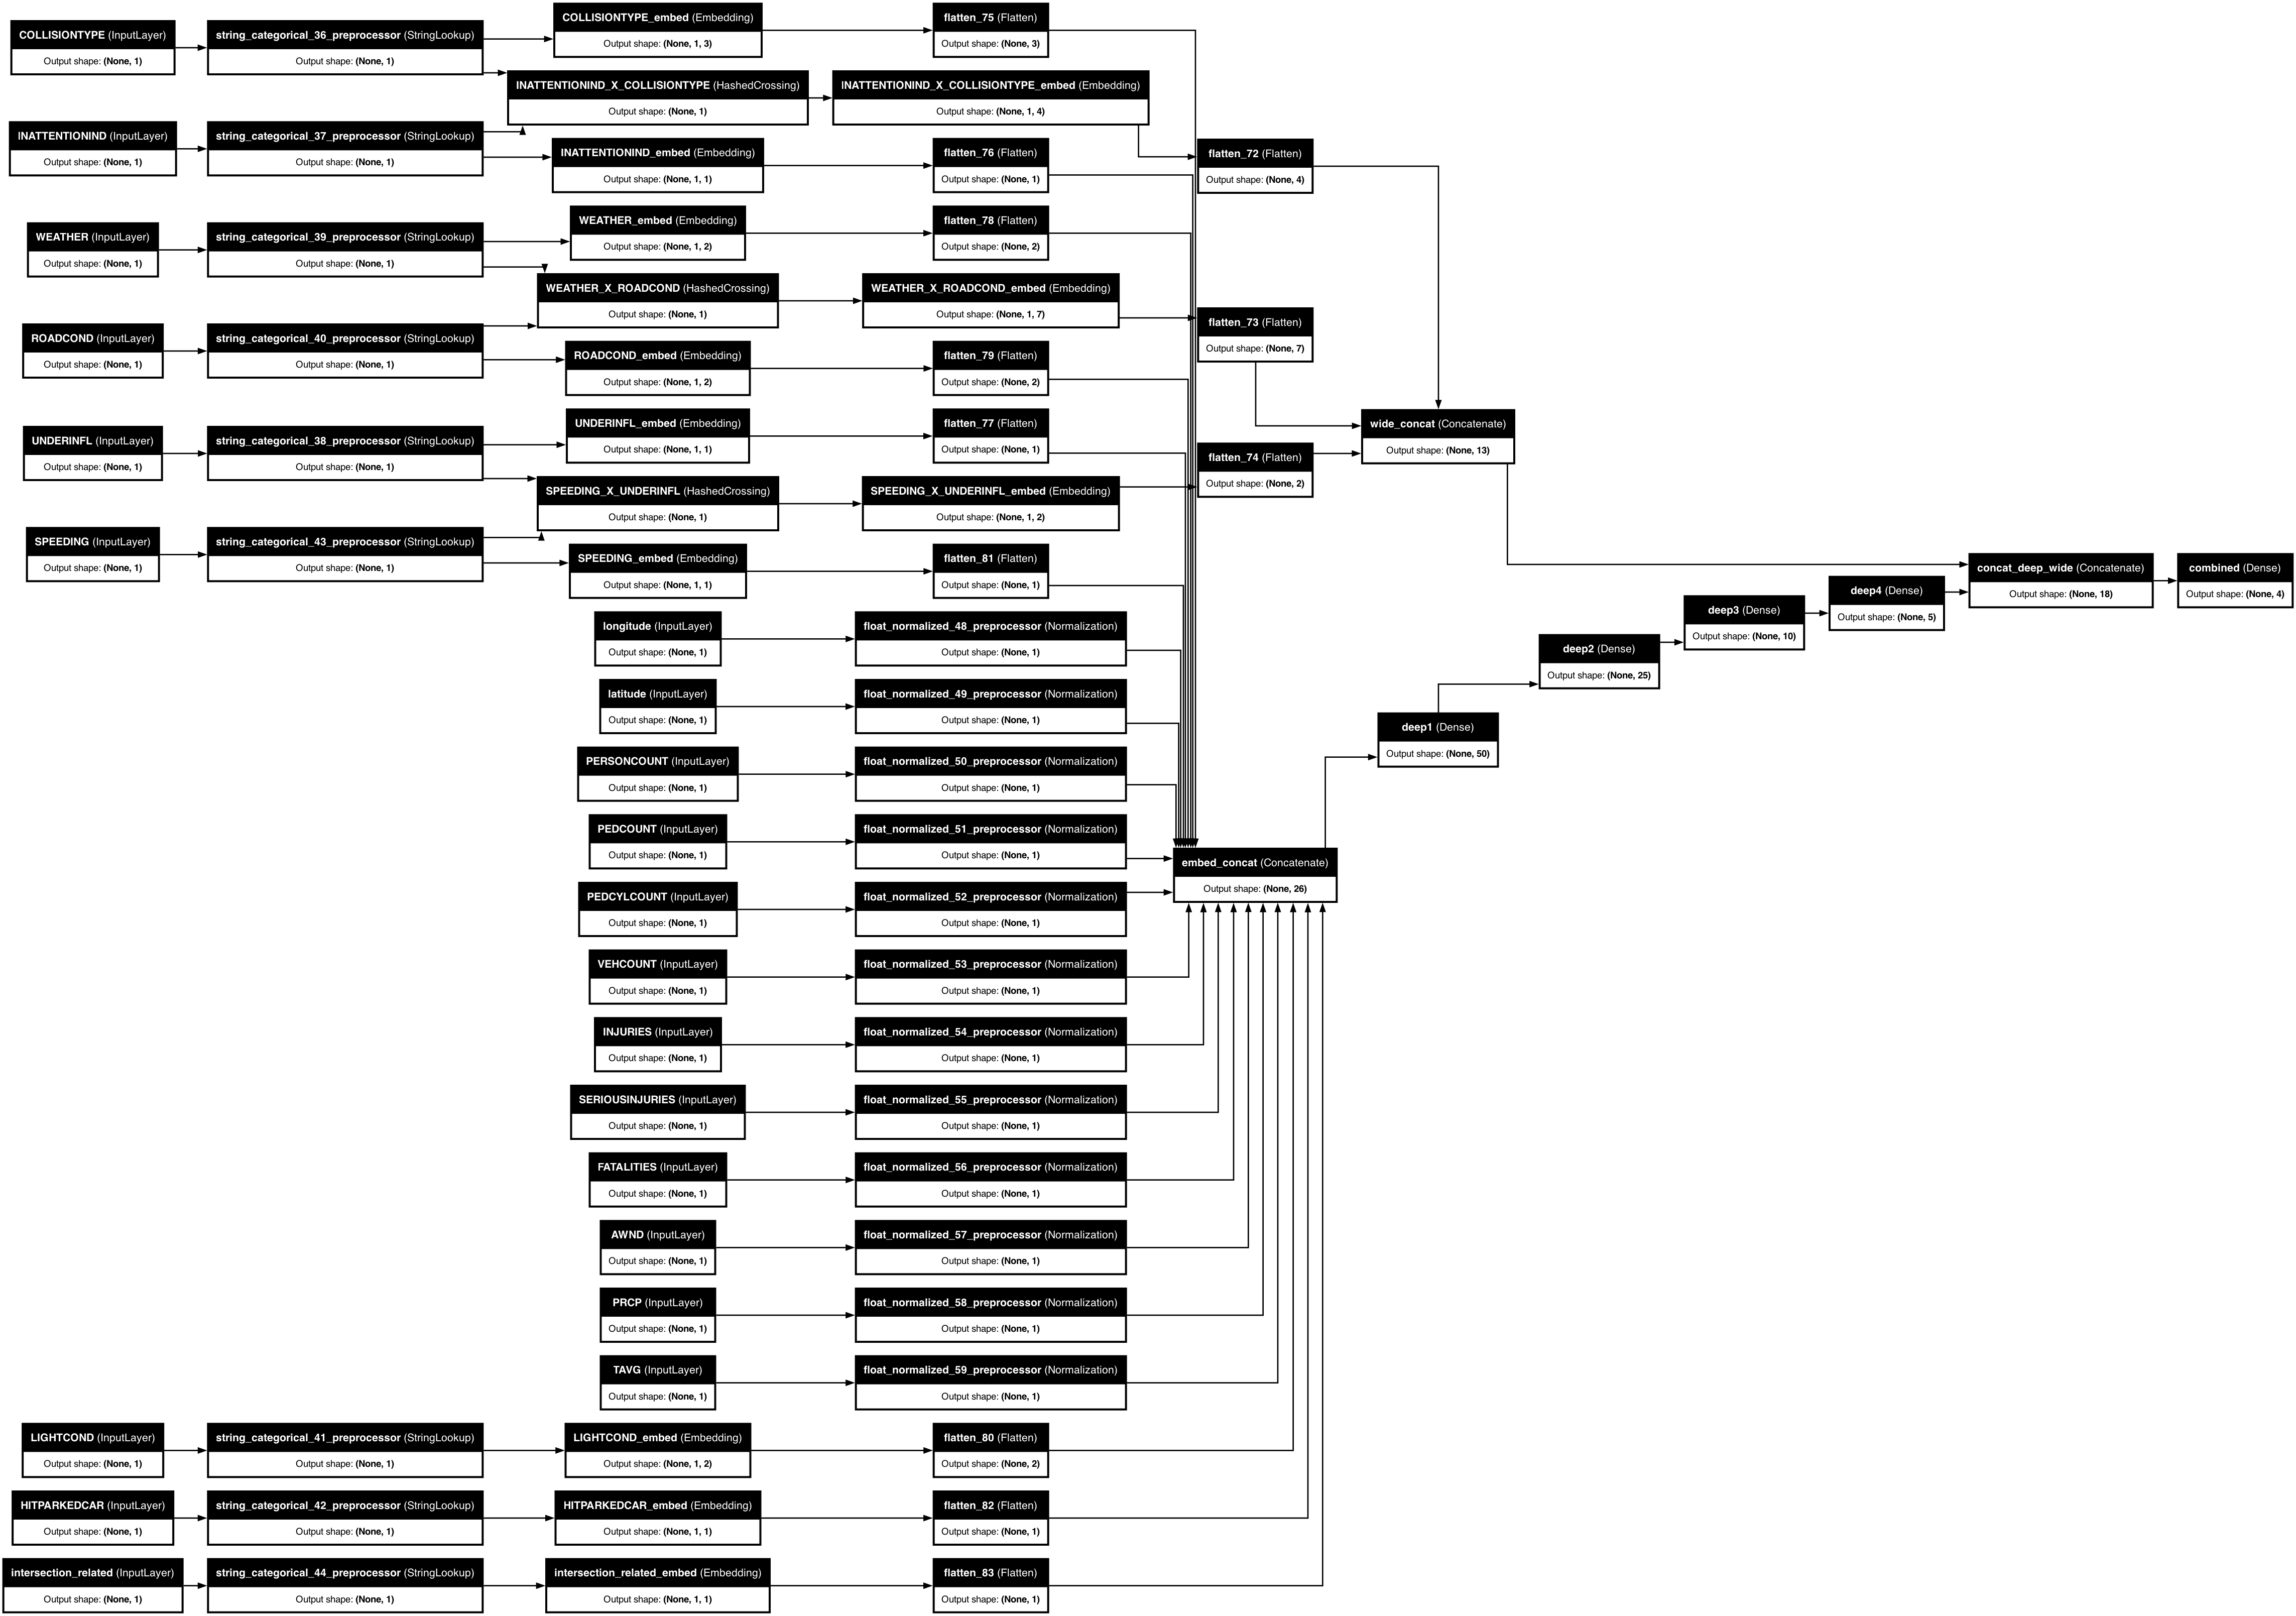

In [78]:
deep_branch2 = deep_branch
deep_branch2 = Dense(units=5,activation='relu', name='deep4')(deep_branch2)

# merge the deep and wide branch
final_branch2 = Concatenate(name='concat_deep_wide')([deep_branch2, wide_branch])
final_branch2 = Dense(units=4,activation='softmax',
                     name='combined')(final_branch2)

training_model2 = keras.Model(inputs=dict_inputs, outputs=final_branch2)
training_model2.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

training_model2.summary()

plot_model(
    training_model2, to_file='model2.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [79]:
# saving each loss function at each epoch
history2 = training_model2.fit(
    ds_train, epochs = 10, validation_data = ds_test
)

Epoch 1/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8913 - loss: 0.3101 - val_accuracy: 0.9983 - val_loss: 0.0024
Epoch 2/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9993 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 1.3500e-04
Epoch 3/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 1.6114e-04 - val_accuracy: 1.0000 - val_loss: 1.6604e-05
Epoch 4/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 5.1565e-05 - val_accuracy: 1.0000 - val_loss: 6.3689e-06
Epoch 5/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 4.0016e-05 - val_accuracy: 1.0000 - val_loss: 2.7332e-06
Epoch 6/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 1.7909e-04 - val_accuracy: 1.0000 - val_loss: 4.2312e-05
Epoch 7/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 7.4560e-05 - val_accuracy: 1.0000 - val_loss: 6.2457e-06
Epoch 8/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3

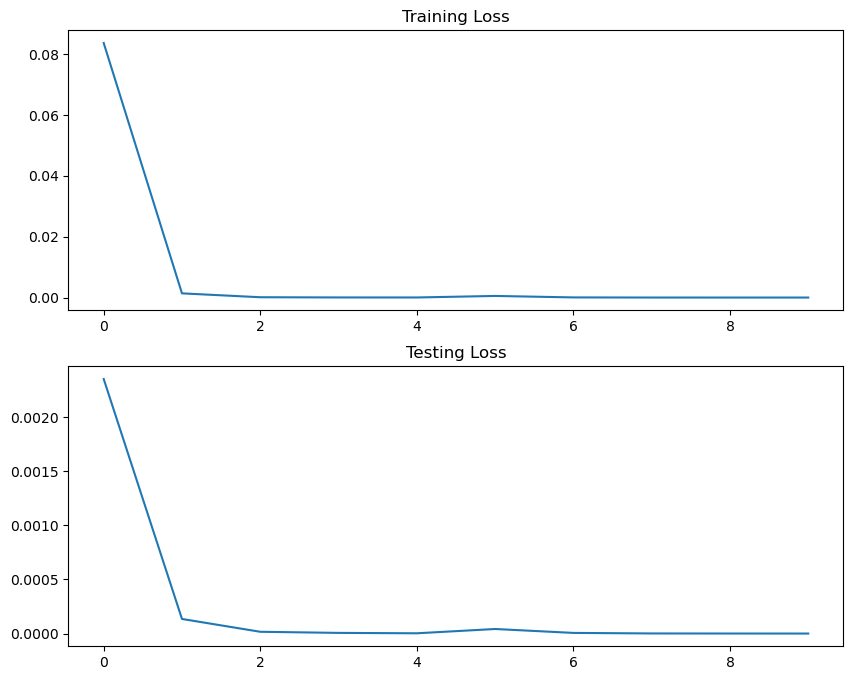

In [89]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(history2.history["loss"])
plt.title("Training Loss")

plt.subplot(2,1,2)
plt.plot(history2.history["val_loss"])
plt.title("Testing Loss")

plt.show()

In [81]:
pred2 = training_model2.predict(ds_test)
yhat2 = np.argmax(pred2, axis = 1)

print(mt.classification_report(df_test["SEVERITYCODE"], yhat2))
mt.recall_score(df_test["SEVERITYCODE"], yhat2, average = "macro")

350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14396
           1       1.00      1.00      1.00      7561
           2       1.00      1.00      1.00       382
           3       1.00      1.00      1.00        38

    accuracy                           1.00     22377
   macro avg       1.00      1.00      1.00     22377
weighted avg       1.00      1.00      1.00     22377



1.0

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ COLLISIONTYPE       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ INATTENTIONIND      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNDERINFL           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ WEATHER             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROADCOND            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LIGHTCOND           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SPEEDING            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ HITPARKEDCAR        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ intersection_relat… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ COLLISIONTYPE[0]… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ INATTENTIONIND[0… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ UNDERINFL[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ WEATHER[0][0]     │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ ROADCOND[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ LIGHTCOND[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ SPEEDING[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ HITPARKEDCAR[0][

 Total params: 3,711 (14.54 KB)

 Trainable params: 3,675 (14.36 KB)

 Non-trainable params: 36 (192.00 B)

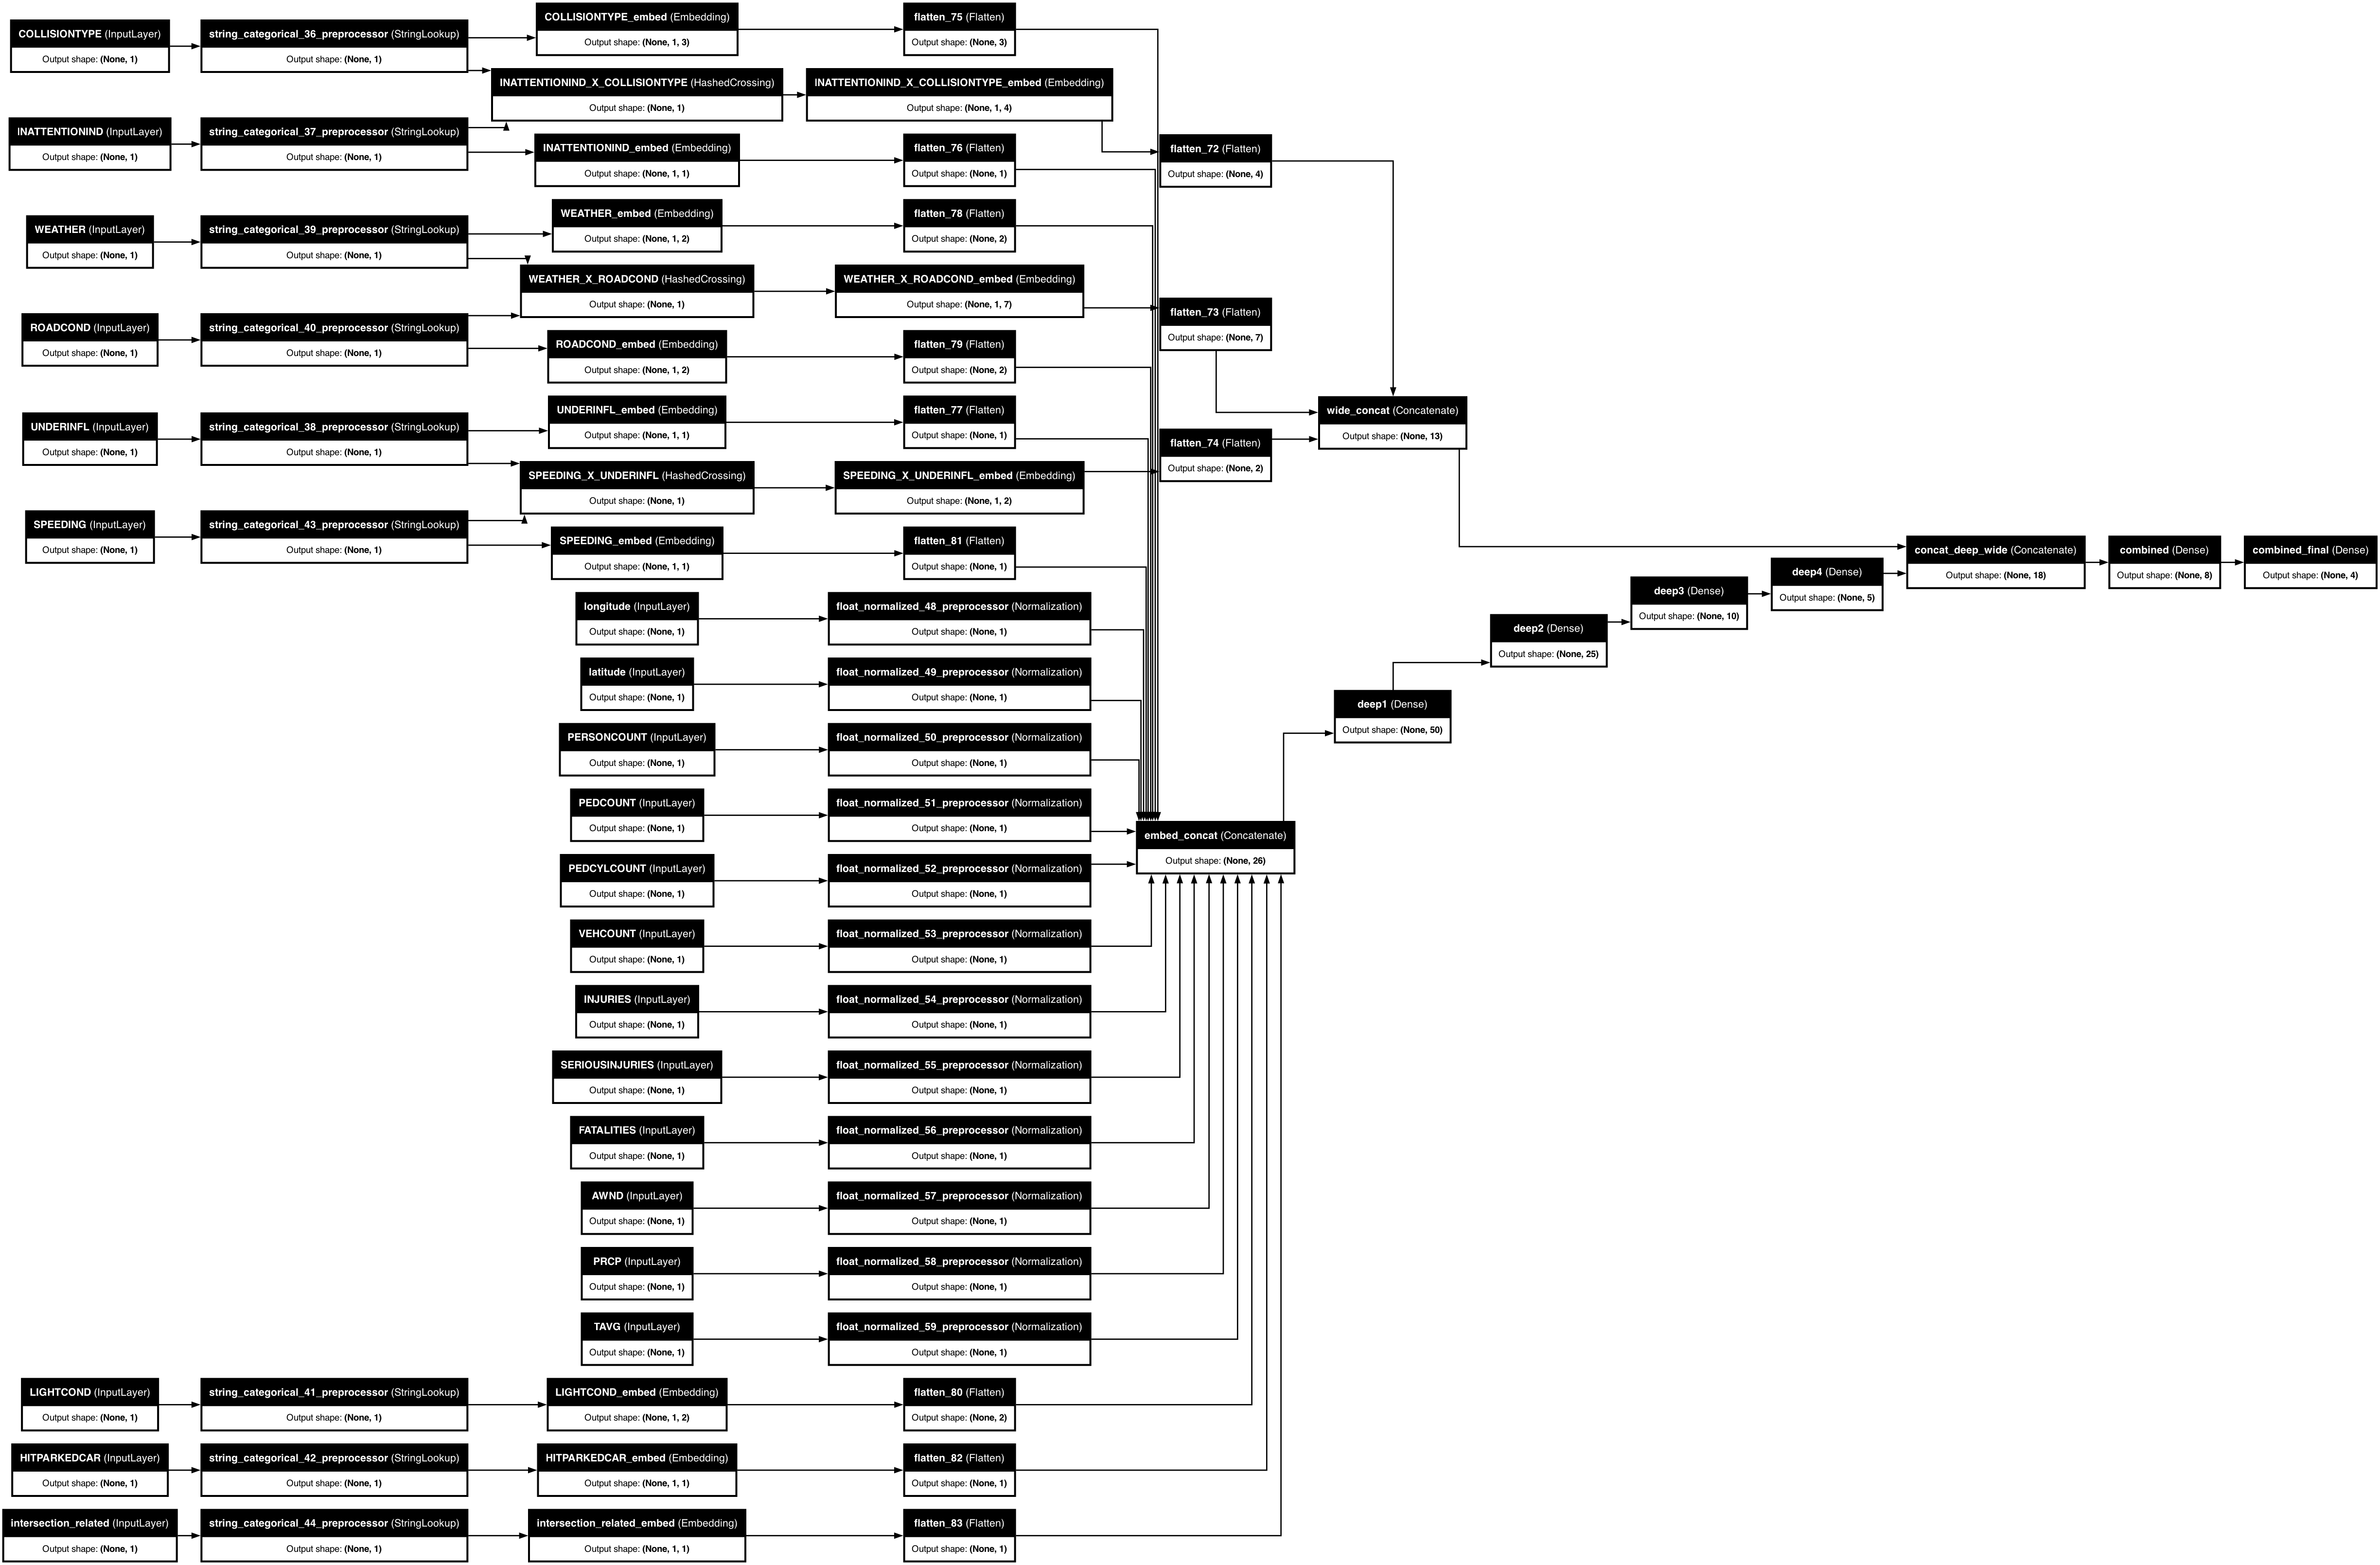

In [83]:
# merge the deep and wide branch
final_branch3 = Concatenate(name='concat_deep_wide')([deep_branch2, wide_branch])
final_branch3 = Dense(units=8,activation='relu',
                     name='combined')(final_branch3)
final_branch3 = Dense(units=4,activation='softmax',
                     name='combined_final')(final_branch3)

training_model3 = keras.Model(inputs=dict_inputs, outputs=final_branch3)
training_model3.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

training_model3.summary()

plot_model(
    training_model3, to_file='model3.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [84]:
# saving each loss function at each epoch
history3 = training_model3.fit(
    ds_train, epochs = 10, validation_data = ds_test
)

Epoch 1/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9894 - loss: 0.0560 - val_accuracy: 0.9998 - val_loss: 0.0014
Epoch 2/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 7.1183e-04 - val_accuracy: 1.0000 - val_loss: 2.5700e-04
Epoch 3/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 1.0375e-04 - val_accuracy: 1.0000 - val_loss: 1.5877e-04
Epoch 4/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 4.0550e-05 - val_accuracy: 1.0000 - val_loss: 1.2754e-05
Epoch 5/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.0000 - loss: 1.0532e-05 - val_accuracy: 1.0000 - val_loss: 4.5593e-06
Epoch 6/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 3.8095e-06 - val_accuracy: 1.0000 - val_loss: 1.7238e-06
Epoch 7/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 1.5518e-06 - val_accuracy: 1.0000 - val_loss: 7.1652e-07
Epoch 8/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━

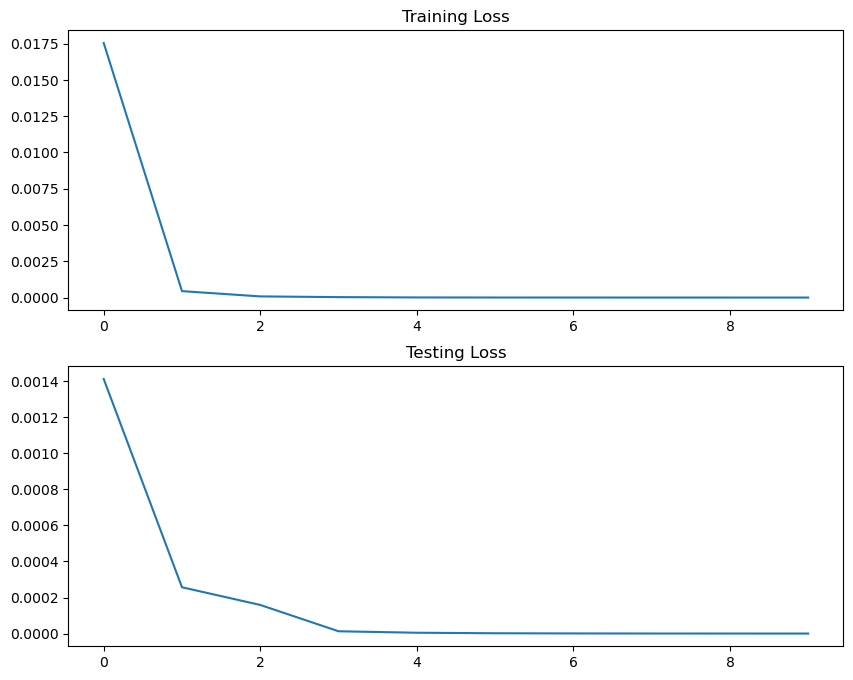

In [88]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(history3.history["loss"])
plt.title("Training Loss")

plt.subplot(2,1,2)
plt.plot(history3.history["val_loss"])
plt.title("Testing Loss")

plt.show()

In [86]:
pred3 = training_model3.predict(ds_test)
yhat3 = np.argmax(pred3, axis = 1)

print(mt.classification_report(df_test["SEVERITYCODE"], yhat3))
mt.recall_score(df_test["SEVERITYCODE"], yhat3, average = "macro")

350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14396
           1       1.00      1.00      1.00      7561
           2       1.00      1.00      1.00       382
           3       1.00      1.00      1.00        38

    accuracy                           1.00     22377
   macro avg       1.00      1.00      1.00     22377
weighted avg       1.00      1.00      1.00     22377



1.0

Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). For classification tasks, compare using the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations.  Use proper statistical methods to compare the performance of different models.  

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ COLLISIONTYPE       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ INATTENTIONIND      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNDERINFL           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ WEATHER             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROADCOND            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LIGHTCOND           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SPEEDING            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ HITPARKEDCAR        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ intersection_relat… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ COLLISIONTYPE[0]… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ INATTENTIONIND[0… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ UNDERINFL[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ WEATHER[0][0]     │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ ROADCOND[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ LIGHTCOND[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ SPEEDING[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ HITPARKEDCAR[0][

 Total params: 3,040 (11.92 KB)

 Trainable params: 3,004 (11.73 KB)

 Non-trainable params: 36 (192.00 B)

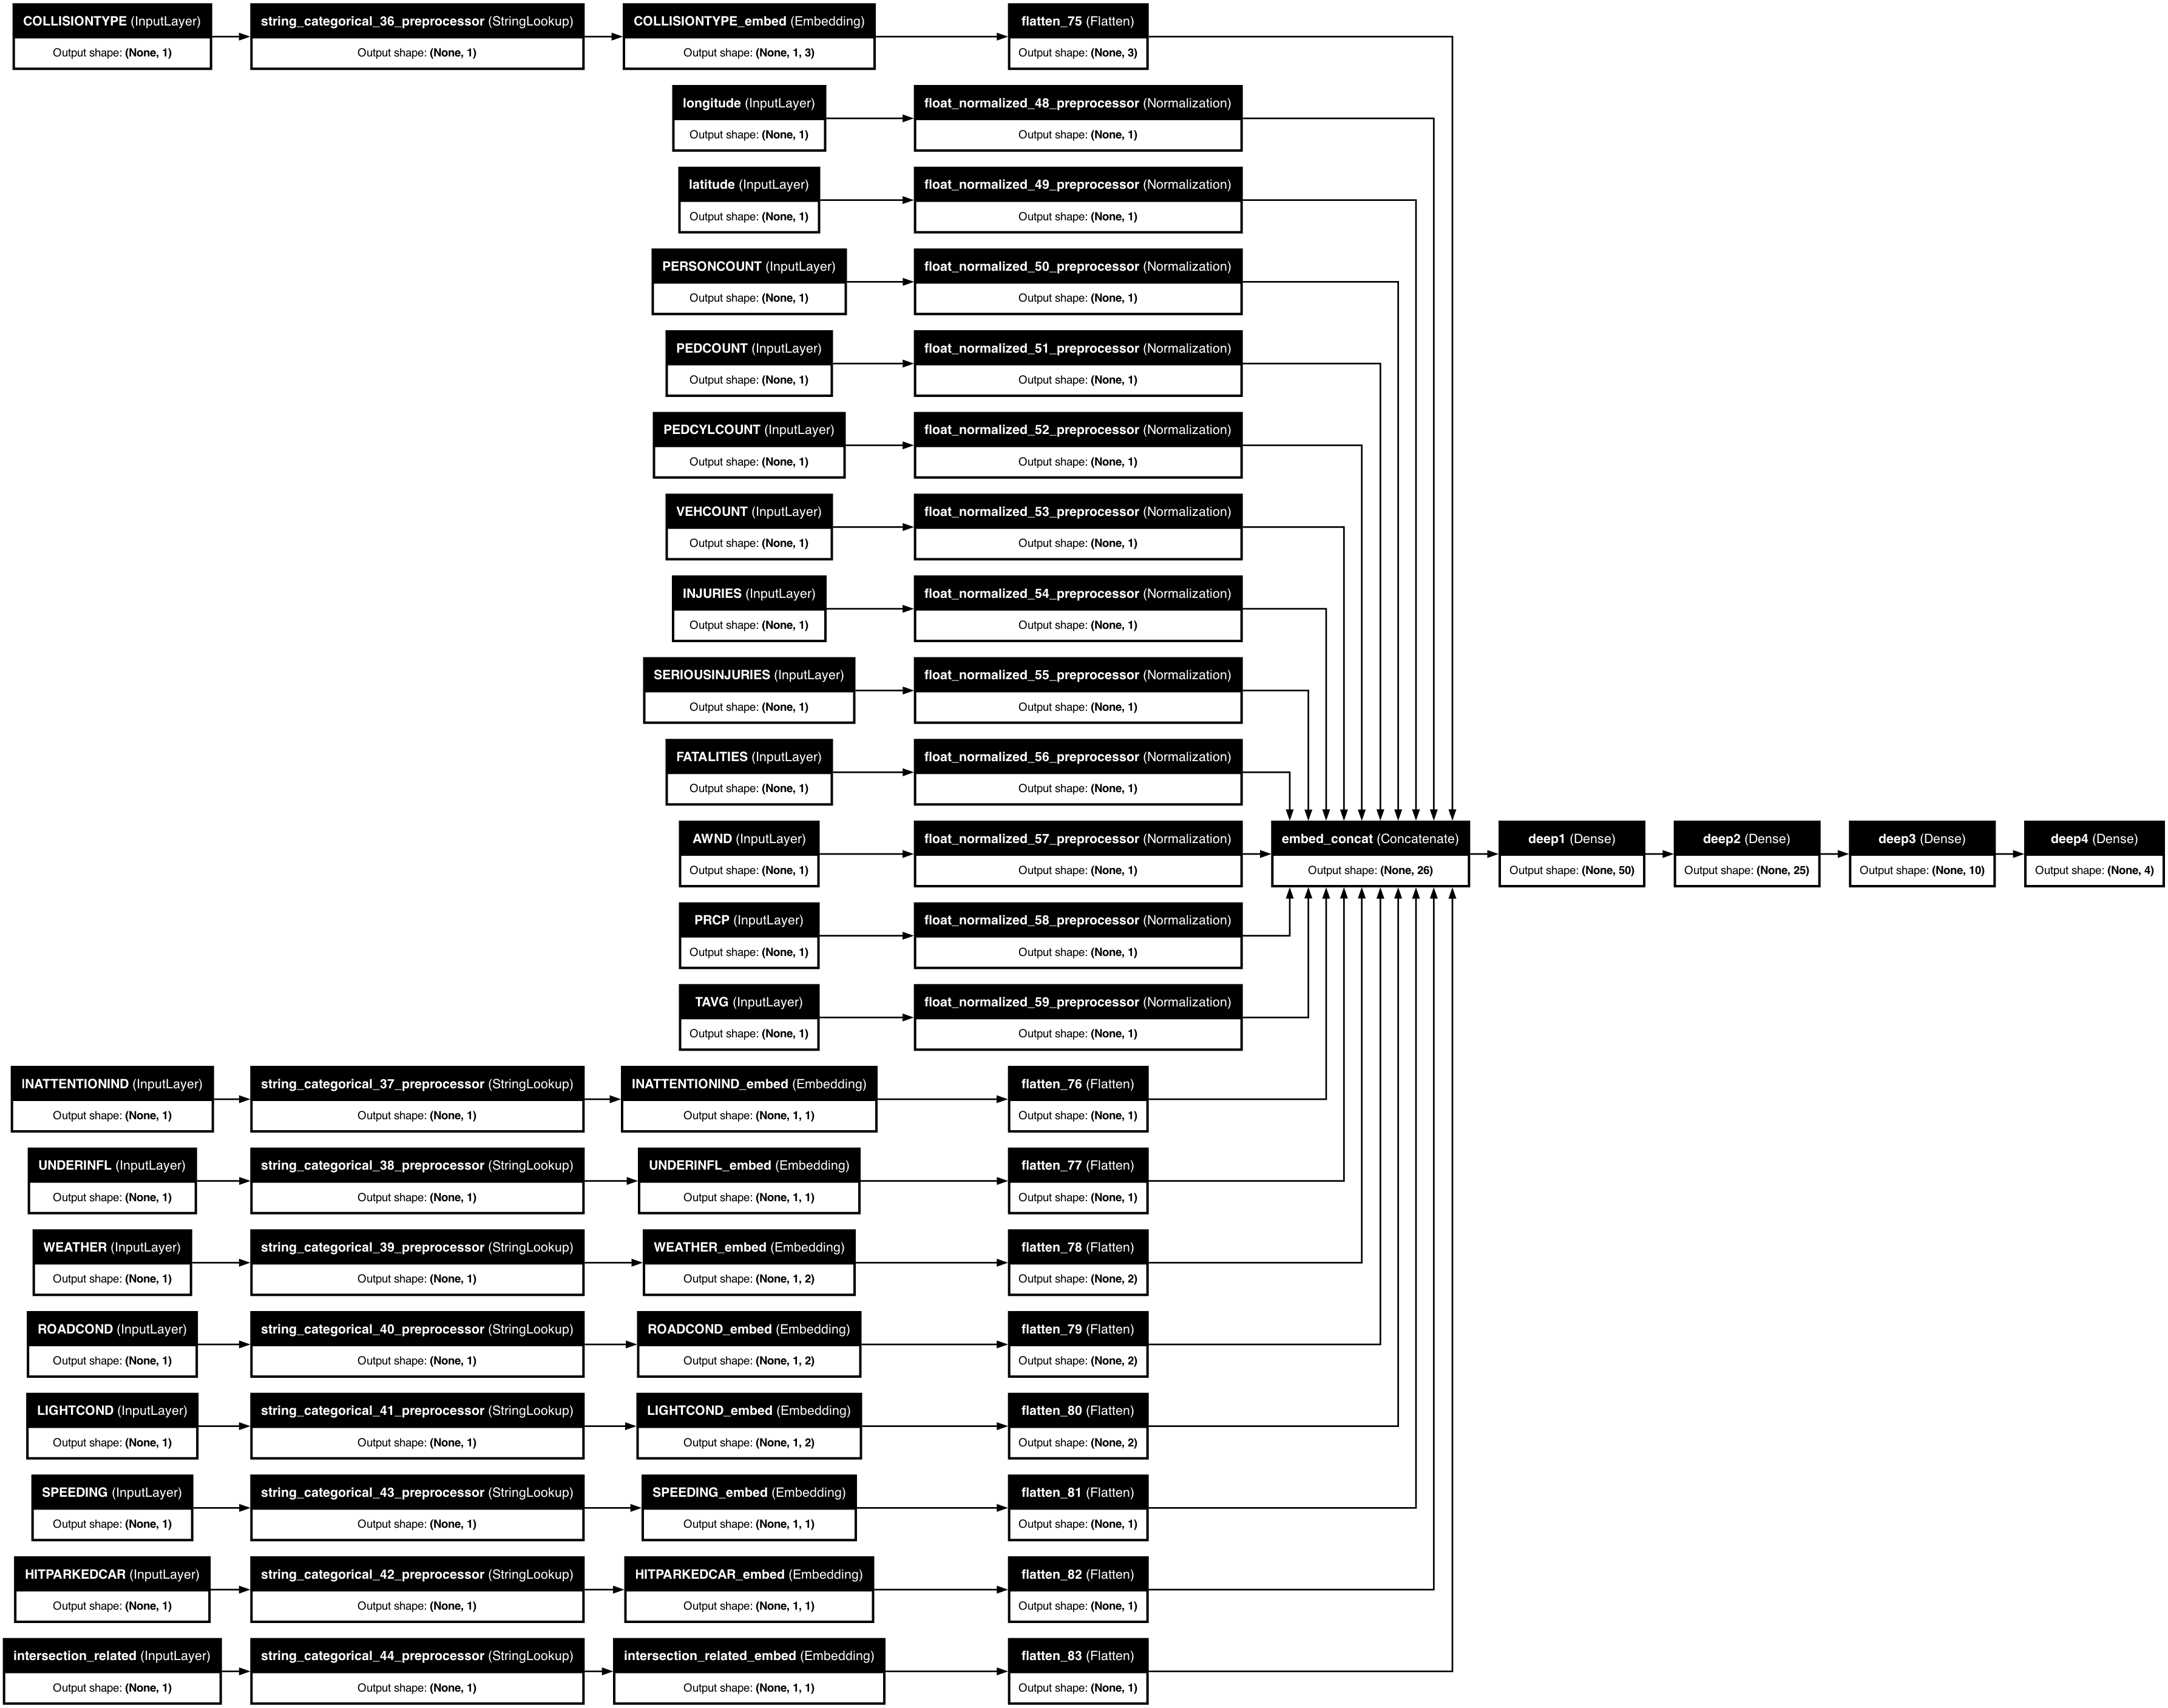

In [91]:
deep_branch3 = deep_branch
deep_branch3 = Dense(units=4,activation='softmax', name='deep4')(deep_branch3)

training_model4 = keras.Model(inputs=dict_inputs, outputs=deep_branch3)
training_model4.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

training_model4.summary()

plot_model(
    training_model4, to_file='model4.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [92]:
# saving each loss function at each epoch
history4 = training_model4.fit(
    ds_train, epochs = 10, validation_data = ds_test
)

Epoch 1/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9073 - loss: 3.6148 - val_accuracy: 1.0000 - val_loss: 7.0829e-04
Epoch 2/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 3.6872e-04 - val_accuracy: 1.0000 - val_loss: 6.0573e-05
Epoch 3/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 4.3490e-05 - val_accuracy: 1.0000 - val_loss: 1.6371e-05
Epoch 4/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 1.2935e-05 - val_accuracy: 1.0000 - val_loss: 5.8315e-06
Epoch 5/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 4.7234e-06 - val_accuracy: 1.0000 - val_loss: 2.0794e-06
Epoch 6/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 1.7312e-06 - val_accuracy: 1.0000 - val_loss: 8.1365e-07
Epoch 7/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 6.9138e-07 - val_accuracy: 1.0000 - val_loss: 3.4942e-07
Epoch 8/10
1399/1399 ━━━━━━━━━━━━━━━━━

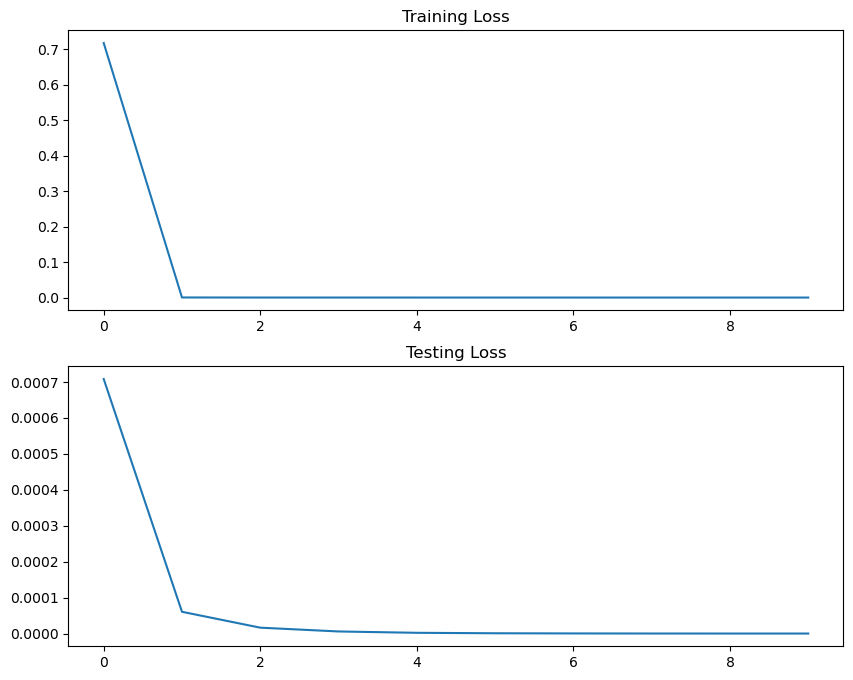

In [93]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(history4.history["loss"])
plt.title("Training Loss")

plt.subplot(2,1,2)
plt.plot(history4.history["val_loss"])
plt.title("Testing Loss")

plt.show()

In [94]:
pred4 = training_model4.predict(ds_test)
yhat4 = np.argmax(pred4, axis = 1)

print(mt.classification_report(df_test["SEVERITYCODE"], yhat4))
mt.recall_score(df_test["SEVERITYCODE"], yhat4, average = "macro")

350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14396
           1       1.00      1.00      1.00      7561
           2       1.00      1.00      1.00       382
           3       1.00      1.00      1.00        38

    accuracy                           1.00     22377
   macro avg       1.00      1.00      1.00     22377
weighted avg       1.00      1.00      1.00     22377



1.0

In [95]:
def mcnemar(y, yhat1, yhat2):
    b = 0
    c = 0
    
    for i in range(len(y)):
        if yhat1[i] == yhat2[i]:
            continue
        if yhat1[i] == y[i]:
            b +=1
        else:
            c +=1
            
    m = ((np.abs(b-c) -1) ** 2)/(b+c) 
    print(m)
    # critical value for 95% confidence
    return m > 3.841

In [96]:
# model 1 vs model 2
mcnemar(df_test["SEVERITYCODE"], yhat, yhat2)

inf


/var/folders/gx/xhl2hcf557x04tyzyjdg7lm40000gn/T/ipykernel_18748/2676970226.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  m = ((np.abs(b-c) -1) ** 2)/(b+c)


True

In [97]:
# model 1 vs model 3
mcnemar(df_test["SEVERITYCODE"], yhat, yhat3)

inf


/var/folders/gx/xhl2hcf557x04tyzyjdg7lm40000gn/T/ipykernel_18748/2676970226.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  m = ((np.abs(b-c) -1) ** 2)/(b+c)


True

In [98]:
# model 2 vs model 3
mcnemar(df_test["SEVERITYCODE"], yhat2, yhat3)

inf


/var/folders/gx/xhl2hcf557x04tyzyjdg7lm40000gn/T/ipykernel_18748/2676970226.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  m = ((np.abs(b-c) -1) ** 2)/(b+c)


True

In [99]:
# model 1 vs model 4
mcnemar(df_test["SEVERITYCODE"], yhat, yhat4)

inf


/var/folders/gx/xhl2hcf557x04tyzyjdg7lm40000gn/T/ipykernel_18748/2676970226.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  m = ((np.abs(b-c) -1) ** 2)/(b+c)


True

We chose model 1 of models 1-3 because model 1 was the fastest model so therefore the best. Because we are dividng by 0 this means there ws no difference. we fail to reject and there was no significant different between the model. 

In [ ]:
# model 1 vs model 4

because they have no different cells we fail to reject null that the models are approximately the saem. in this case they are exactly the same. 

We know the result of this because all models are 100% accuracy so b and c are zero which result results in a 0 in the denominator
Since the models hae the same recall we will just pick the model that is fastest.

# Exceptional Work

5000 students: You have free reign to provide additional analyses.
One idea (required for 7000 level students): Capture the embedding weights from the deep network and (if needed) perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.


In [112]:
def setup_embedding_from_categorical2(feature_space, col_name):
    # what the maximum integer value for this variable?
    # which is the same as the number of categories
    N = len(feature_space.preprocessors[col_name].get_vocabulary())
    
    # get the output from the feature space, which is input to embedding
    x = feature_space.preprocessors[col_name].output
    
    # now use an embedding to deal with integers from feature space
    x = Embedding(input_dim=N, 
                  output_dim=2, 
                  input_length=1, name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x # return the tensor here 

In [117]:
# reset the input branch for the 
emb_outputs = []

# iterate through categroical vairables
for col in categorical_headers:
    
    # get the output tensoe from enbedding layer
    x = setup_embedding_from_categorical2(feature_space, col)
    
    # save these outputs in list to concatenate later
    emb_outputs.append(x)
    
emb_branch = Concatenate(name='embed_concat')(emb_outputs)
final_branch_emb = Dense(units = 4, activation = 'softmax', name='combined')(emb_branch)

training_model_emb = keras.Model(inputs=dict_inputs, outputs=final_branch_emb)
training_model_emb.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics = ["acc"]
)

training_model_emb.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ COLLISIONTYPE       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ INATTENTIONIND      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNDERINFL           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ WEATHER             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROADCOND            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LIGHTCOND           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SPEEDING            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ HITPARKEDCAR        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ intersection_relat… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ COLLISIONTYPE[0]… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ INATTENTIONIND[0… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ UNDERINFL[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ WEATHER[0][0]     │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ ROADCOND[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ LIGHTCOND[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ SPEEDING[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ HITPARKEDCAR[0][

 Total params: 152 (608.00 B)

 Trainable params: 152 (608.00 B)

 Non-trainable params: 0 (0.00 B)

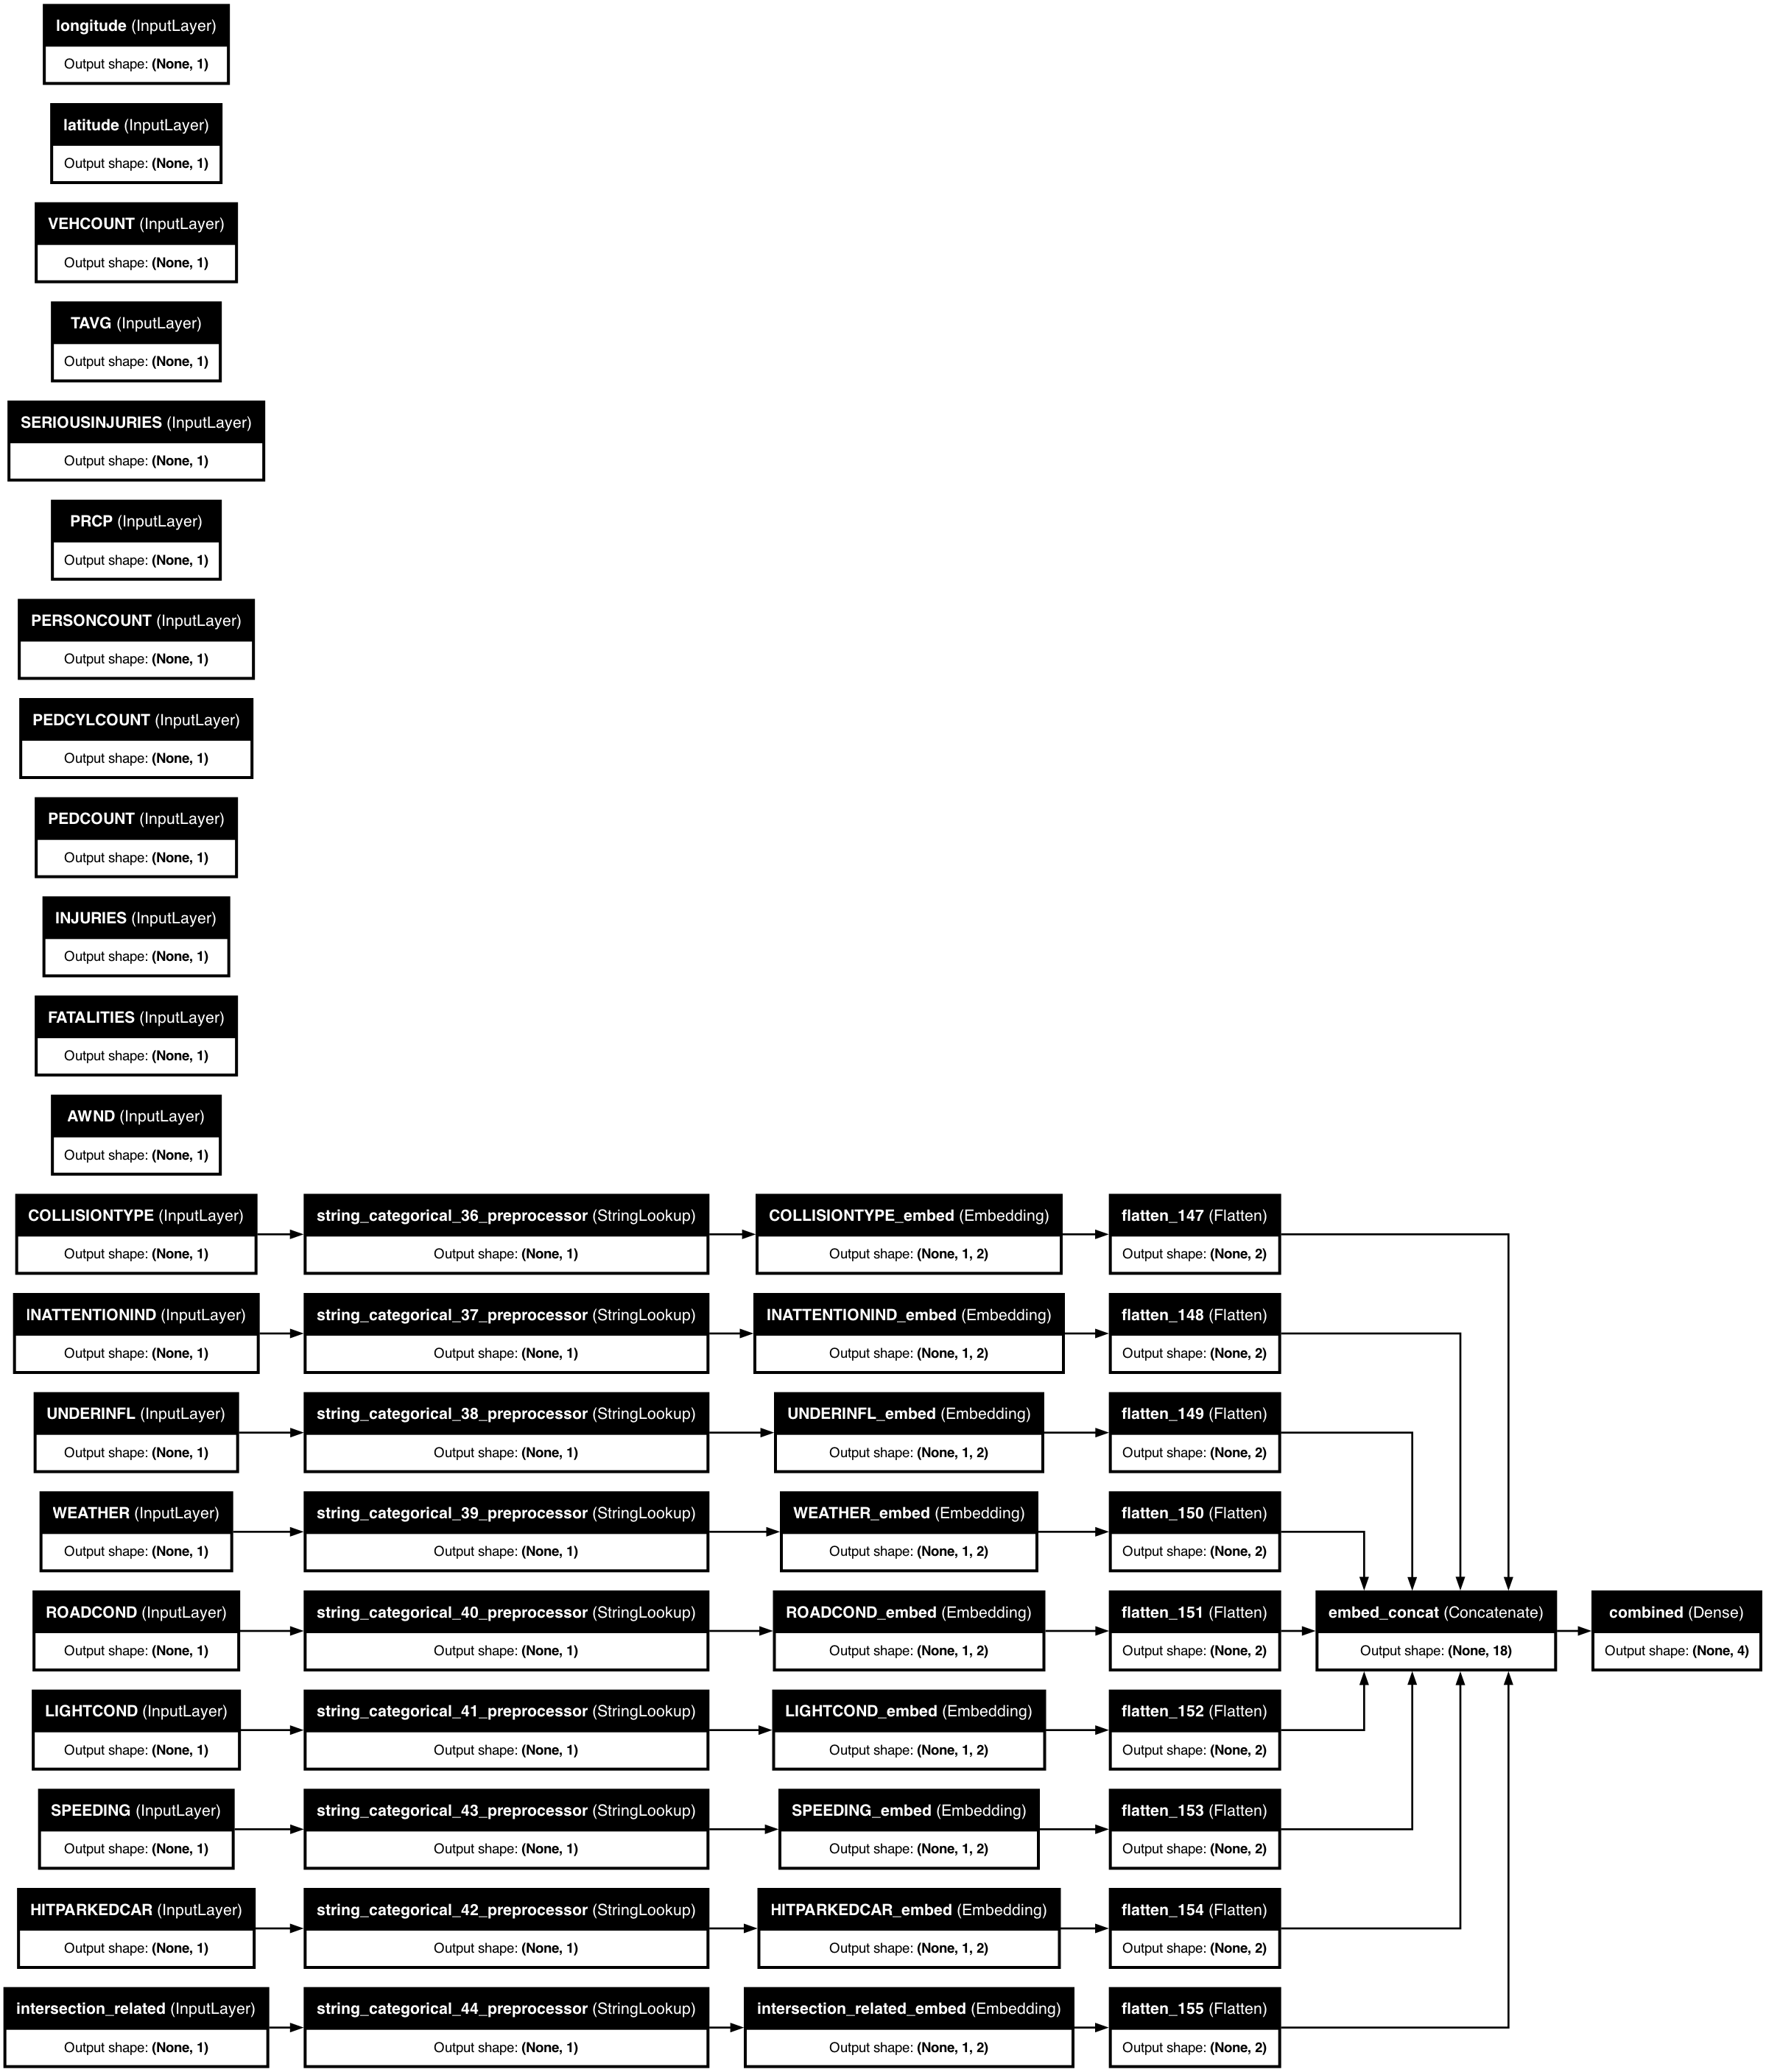

In [119]:
plot_model(
    training_model_emb, to_file='model_emb.png', show_shapes = True, show_layer_names = True, 
    rankdir='LR', expand_nested = False, dpi= 96
)

In [121]:
emb_weights = []

for col in categorical_headers:
    layer = col + "_embed"
    w = training_model_emb.get_layer(layer).get_weights()[0]
    emb_weights.append(w)
    
emb_weights

[array([[-0.00741374,  0.03470807],
        [ 0.00830837, -0.02604767],
        [-0.02115464, -0.00315182],
        [-0.04729178,  0.00030001],
        [ 0.00763843,  0.03703466],
        [-0.04000242, -0.02535797],
        [ 0.01306379,  0.03616953],
        [ 0.03325943, -0.00854602],
        [-0.04341621, -0.02452545]], dtype=float32),
 array([[-0.03713486, -0.0362831 ],
        [ 0.00812262,  0.04083169]], dtype=float32),
 array([[-0.02225088, -0.01405717],
        [-0.01432954,  0.00674262]], dtype=float32),
 array([[ 0.03406509,  0.0416323 ],
        [-0.03235457, -0.01154251],
        [-0.0424462 ,  0.01526803],
        [ 0.01914424,  0.00923892],
        [-0.04574899, -0.0413924 ],
        [ 0.03987566, -0.0345258 ],
        [ 0.02878319, -0.03600682],
        [-0.00215033,  0.00255982]], dtype=float32),
 array([[ 0.03739207,  0.03075339],
        [-0.02493337,  0.00587123],
        [-0.00825161,  0.0216277 ],
        [ 0.00810728,  0.02772168],
        [-0.03514729, -0.0265111

In [128]:
w1 = []
w2 = []
f = []

for i, weights in enumerate(emb_weights):
    feature = categorical_headers[i]
    categories = feature_space.preprocessors[feature].get_vocabulary()
    for j, weight in enumerate(weights):
        w1.append(weight[0])
        w2.append(weight[1])
        f.append("{}_{}".format(feature, categories[j]))
        
df_embeddings = pd.DataFrame({
    "embedding1": w1, 
    "embedding2": w2,
    "feature_category": f
})

df_embeddings

embedding1  embedding2                  feature_category
0    -0.007414    0.034708              COLLISIONTYPE_Angles
1     0.008308   -0.026048          COLLISIONTYPE_Parked Car
2    -0.021155   -0.003152          COLLISIONTYPE_Rear Ended
3    -0.047292    0.000300           COLLISIONTYPE_Sideswipe
4     0.007638    0.037035           COLLISIONTYPE_Left Turn
5    -0.040002   -0.025358          COLLISIONTYPE_Pedestrian
6     0.013064    0.036170              COLLISIONTYPE_Cycles
7     0.033259   -0.008546          COLLISIONTYPE_Right Turn
8    -0.043416   -0.024525             COLLISIONTYPE_Head On
9    -0.037135   -0.036283              INATTENTIONIND_False
10    0.008123    0.040832               INATTENTIONIND_True
11   -0.022251   -0.014057                   UNDERINFL_False
12   -0.014330    0.006743                    UNDERINFL_True
13    0.034065    0.041632                     WEATHER_Clear
14   -0.032355   -0.011543                   WEATHER_Raining
15   -0.042446    0.015268                  WEATHER_Overcast
16    0.019144    0.009239                   WEATHER_Snowing
17   -0.045749   -0.041392            WEATHER_Fog/Smog/Smoke
18    0.039876   -0.034526  WEATHER_Sleet/Hail/Freezing Rain
19    0.028783   -0.036007         WEATHER_Blowing Sand/Dirt
20   -0.002150    0.002560          WEATHER_Severe Crosswind
21    0.037392    0.030753                      ROADCOND_Dry
22   -0.024933    0.005871                      ROADCOND_Wet
23   -0.008252    0.021628                      ROADCOND_Ice
24    0.008107    0.027722               ROADCOND_Snow/Slush
25   -0.035147   -0.026511           ROADCOND_Standing Water
26   -0.034794    0.020351            ROADCOND_Sand/Mud/Dirt
27    0.037368   -0.036000                      ROADCOND_Oil
28    0.049324    0.018787                       LIGHTCOND_3
29   -0.016046    0.024060                       LIGHTCOND_1
30   -0.025505    0.035803                       LIGHTCOND_2
31   -0.013256    0.000195                       LIGHTCOND_0
32   -0.041602   -0.001782                    SPEEDING_False
33   -0.022180    0.009575                     SPEEDING_True
34    0.018255    0.009046                HITPARKEDCAR_False
35    0.046820   -0.032958                 HITPARKEDCAR_True
36   -0.026152   -0.032598        intersection_related_False
37   -0.036337    0.044409         intersection_related_True

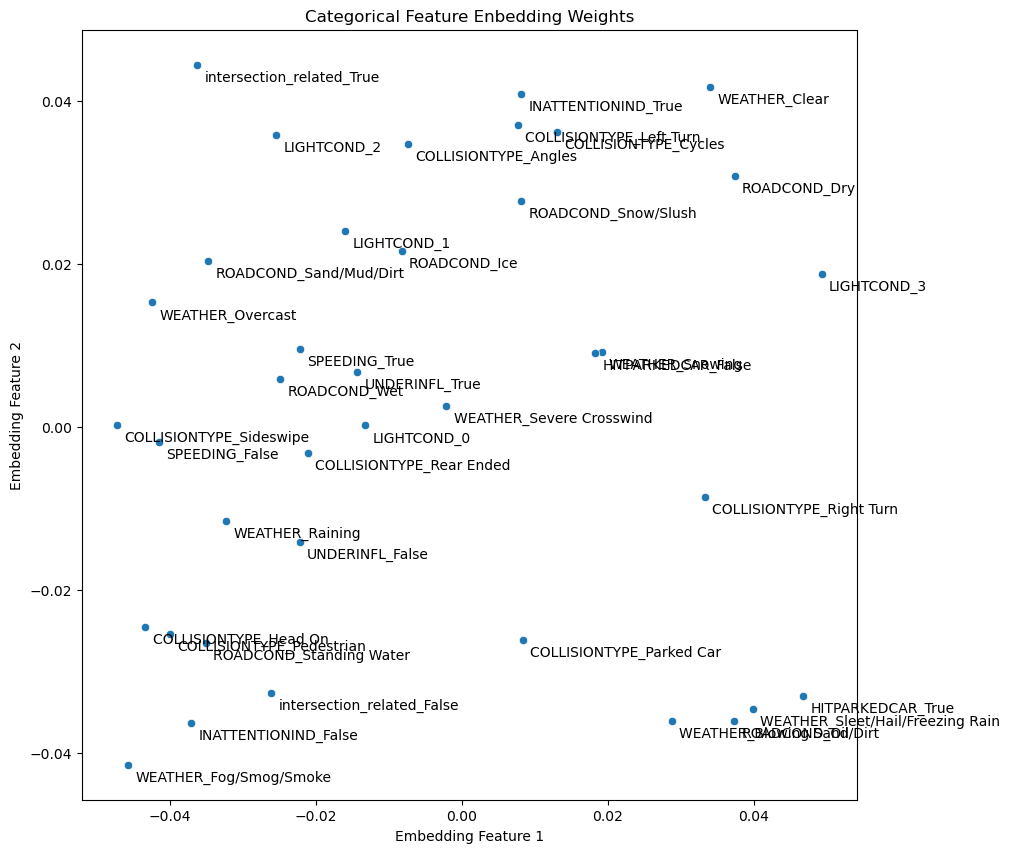

In [133]:
# Site this graph:

import seaborn as sns

plt.figure(figsize = (10, 10))
p1 = sns.scatterplot(
    x='embedding1',
    y='embedding2',
    data=df_embeddings, 
    legend = False
)

for line in range(0, df_embeddings.shape[0]):
    p1.text(
        df_embeddings["embedding1"][line]+0.001,
        df_embeddings["embedding2"][line]-0.002, 
        df_embeddings["feature_category"][line], 
        horizontalalignment = 'left', 
        size = 'medium',
        color = 'black'
    )
    
plt.title('Categorical Feature Enbedding Weights')
plt.xlabel('Embedding Feature 1')
plt.ylabel('Embedding Feature 2')

plt.show()